In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [15]:
image = tf.constant([[[[4],[3]],
                     [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1,
                             padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


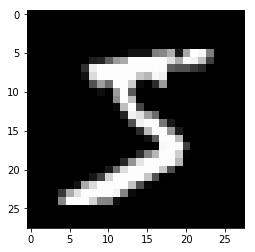

In [9]:
mnist = keras.datasets.mnist #데이터 읽어오기
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#load_data를 통해 train과 test로 분류
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

# 1. Convolution Layer

(1, 14, 14, 5)


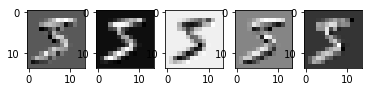

In [20]:
img = img.numpy().reshape(-1,28,28,1) #img.reshape로 하면(Atrribute Error)
img = tf.convert_to_tensor(img)  #API를 사용하기 위해tensor로 변경시켜줌
weight_init = keras.initializers.RandomNormal(stddev=0.01)

#5개의 filter사용
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2,2),
                            padding='SAME', kernel_initializer=weight_init)(img)
print(conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5, i+1), plt.imshow(feature_map.reshape(14,14),
                                     cmap='gray')
plt.show()

##### 위의 output 5개를 다시 pooling에 입력으로 넣어서 해보자

# 2. Pooling Layer

(1, 7, 7, 5)


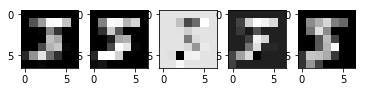

In [23]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2),
                             padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 5, i+1), plt.imshow(feature_map.reshape(7,7),
                                      cmap='gray')
plt.show()